#### CT4101 Machine learning, Semester 1 2021-2022
# Decision tree learning & Impurity (entropy/Gini) examples
#### Dr Patrick Mannion, School of Computer Science, National University of Ireland Galway
#### 04 October 2021

## SciPy Entropy Examples
Below are a few simple examples of calculating entropy using the built in function from scipy.stats

In [63]:
# entropy of a fair coin, i.e. 50% chance of heads, 50% chance of tails
from scipy.stats import entropy
entropy([1/2, 1/2], base=2)

1.0

In [64]:
# entropy of a biased coin, e.g. 60% chance of heads, 40% chance of tails
entropy([60/100, 40/100], base=2)

0.9709505944546688

In [65]:
# entropy of a coin with both sides the same, e.g. 100% chance of heads
entropy([1], base=2)

0.0

# Scikit-learn decision tree examples

In [66]:
import pandas as pd

# details for beer dataset
training_file = "beer_training.csv"
test_file = "beer_test.csv"
independent_cols = ["calorific_value", "nitrogen", "turbidity", "alcohol", "sugars", "bitterness", "beer_id", 
                    "colour", "degree_of_fermentation"]
dependent_col = "style"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

   calorific_value  nitrogen  turbidity style   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273   ale  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364   ale  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182   ale  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818   ale  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455   ale  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation  
0      167   11.04               62.178571  
1      128   13.44               63.032857  
2       88   14.04               63.468571  
3      147   12.48               63.531429  
4       74   12.12               63.747143  
(124, 10)


In [67]:
# set up a matrix X containing the independent variables from the training data
X_training = df_training.loc[:,independent_cols]
print(X_training.head())
print(X_training.shape)

   calorific_value  nitrogen  turbidity   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation  
0      167   11.04               62.178571  
1      128   13.44               63.032857  
2       88   14.04               63.468571  
3      147   12.48               63.531429  
4       74   12.12               63.747143  
(124, 9)


In [68]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_training = df_training.loc[:,dependent_col]
print(y_training.head())
print(y_training.shape)

0    ale
1    ale
2    ale
3    ale
4    ale
Name: style, dtype: object
(124,)


In [69]:
# compute the entropy of the training dataset
print("Value counts")
print(df_training["style"].value_counts())
print("\nNormalised value counts (i.e. probabilities)")
print(df_training["style"].value_counts(normalize=True))

training_entropy = entropy(df_training["style"].value_counts(normalize=True), base=2)
print("\nTraining set entropy:",training_entropy)


Value counts
lager    44
ale      42
stout    38
Name: style, dtype: int64

Normalised value counts (i.e. probabilities)
lager    0.354839
ale      0.338710
stout    0.306452
Name: style, dtype: float64

Training set entropy: 1.5823126935513492


Accuracy on training data: 1.0


[Text(243.4909090909091, 587.0880000000001, 'X[7] <= 9.42\nentropy = 1.582\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(121.74545454545455, 456.624, 'X[5] <= 9.667\nentropy = 0.316\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(60.872727272727275, 326.1600000000001, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(182.61818181818182, 326.1600000000001, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(365.23636363636365, 456.624, 'X[3] <= 3.934\nentropy = 1.256\nsamples = 89\nvalue = [42, 42, 5]'),
 Text(304.3636363636364, 326.1600000000001, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(426.1090909090909, 326.1600000000001, 'X[5] <= 8.226\nentropy = 0.847\nsamples = 51\nvalue = [42, 4, 5]'),
 Text(304.3636363636364, 195.69600000000003, 'X[4] <= 17.46\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(243.4909090909091, 65.23200000000008, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(365.23636363636365, 65.23200000000008, 'entropy = 0.0\nsamples 

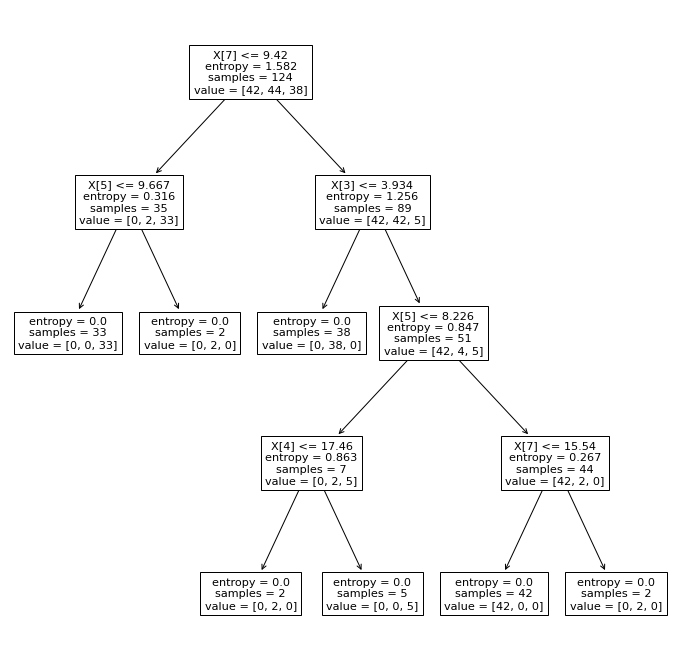

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


# create a model using the default settings (using Gini index)
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_training, y_training)

# compute the accuracy on the training predictions
predictions_training = model.predict(X_training)
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
print("Accuracy on training data:",accuracy_training)

plt.figure(figsize=(12,12))
tree.plot_tree(model)

We can see above that the netropy at the root node is the same as the overall entropy of the training set, i.e. 1.582

Accuracy on training data: 1.0


[Text(362.70000000000005, 597.96, 'X[1] <= 0.36\ngini = 0.665\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(223.20000000000002, 489.24, 'X[7] <= 9.42\ngini = 0.552\nsamples = 84\nvalue = [5, 42, 37]'),
 Text(111.60000000000001, 380.52000000000004, 'X[5] <= 9.667\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(55.800000000000004, 271.8, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(334.8, 380.52000000000004, 'X[3] <= 3.934\ngini = 0.34\nsamples = 50\nvalue = [5, 40, 5]'),
 Text(279.0, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(390.6, 271.8, 'X[5] <= 8.714\ngini = 0.651\nsamples = 13\nvalue = [5, 3, 5]'),
 Text(279.0, 163.07999999999998, 'X[2] <= 1.615\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(223.20000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(502.20000

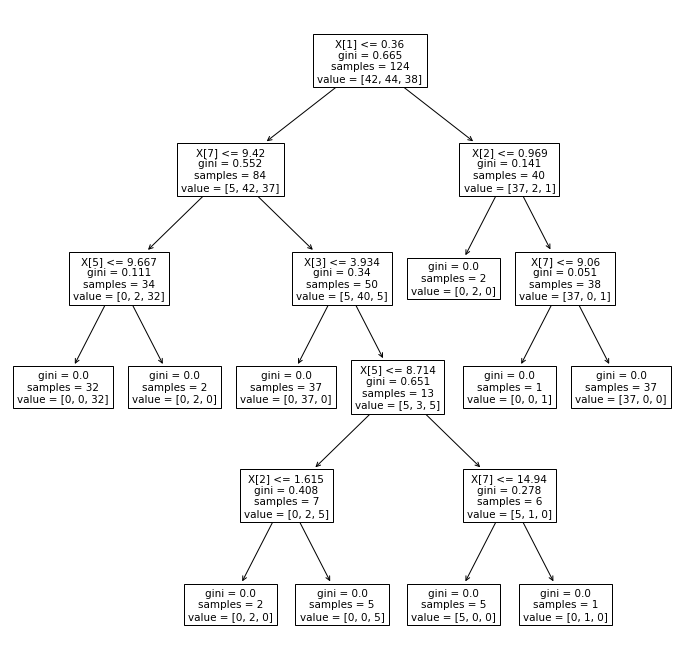

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


# create a model using the default settings (using Gini index)
model = DecisionTreeClassifier()
model.fit(X_training, y_training)

# compute the accuracy on the training predictions
predictions_training = model.predict(X_training)
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
print("Accuracy on training data:",accuracy_training)

plt.figure(figsize=(12,12))
tree.plot_tree(model)